In [43]:
# Data Analysis packages
import pandas as pd
import pandas_profiling 
import numpy as np


# Data Visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Other useful packages
from datetime import datetime
import warnings
import os
from tqdm import tqdm, tqdm_notebook
from subprocess import check_output
from pydotplus.graphviz import graph_from_dot_data

# Sklearn API
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
# Classification Algo Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
# Regression Algo Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





# Stats API
import scipy.stats as stats
import statsmodels.formula.api as smf

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 500) # OR pd.options.display.max_rows = 500
pd.set_option('display.max_columns', 500) # OR pd.options.display.max_columns = 500



# Decision Tree for Classification

In [6]:
dataset = pd.read_csv('bill_authentication.csv')

In [7]:
dataset.shape

(1372, 5)

In [8]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
dataset.Class.unique()

array([0, 1])

In [10]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
y_pred = classifier.predict(X_test)

In [18]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140   5]
 [  1 129]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.96      0.99      0.98       130

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



# Classification example 2

In [36]:
iris = datasets.load_iris()

In [37]:
X = iris.data[:, [2, 3]] 

In [38]:
y = iris.target 

In [39]:
tree = DecisionTreeClassifier(criterion='entropy', # Initialize and fit classifier
    max_depth=4, random_state=1)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

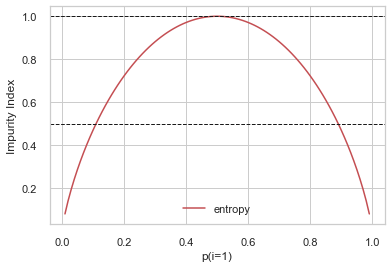

In [33]:
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

x = np.arange(0.0, 1.0, 0.01)                      # Create dummy data
e = [entropy(p) if p != 0 else None for p in x]    # Calculate entropy

plt.plot(x, e, label='entropy', color='r')         # Plot impurity indices
for y in [0.5, 1.0]:
    plt.axhline(y=y, linewidth=1,
                color='k', linestyle='--')
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.legend()
plt.show()

In [44]:
dot_data = export_graphviz(                           # Create dot data
    tree, filled=True, rounded=True,
    class_names=['Setosa', 'Versicolor','Virginica'],
    feature_names=['petal length', 'petal width'],
    out_file=None
)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('tree.png') 

True

# Decision Tree for Regression

In [19]:
dataset = pd.read_csv('petrol_consumption.csv')

In [21]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [22]:
X = dataset.drop('Petrol_Consumption', axis=1)
y = dataset['Petrol_Consumption']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
29,534,541.0
4,410,414.0
26,577,554.0
30,571,554.0
32,577,631.0
37,704,640.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,498.0


In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 50.7
Mean Squared Error: 4115.3
Root Mean Squared Error: 64.15060405015684


# Regression Tree 2

In [45]:
boston = datasets.load_boston()            # Load Boston Dataset
df = pd.DataFrame(boston.data[:, 12])      # Create DataFrame using only the LSAT feature
df.columns = ['LSTAT']
df['MEDV'] = boston.target                 # Create new column with the target MEDV
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [46]:
X = df[['LSTAT']].values                          # Assign matrix X
y = df['MEDV'].values                             # Assign vector y

sort_idx = X.flatten().argsort()                  # Sort X and y by ascending values of X
X = X[sort_idx]
y = y[sort_idx]

tree = DecisionTreeRegressor(criterion='mse',     # Initialize and fit regressor
                             max_depth=3)         
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

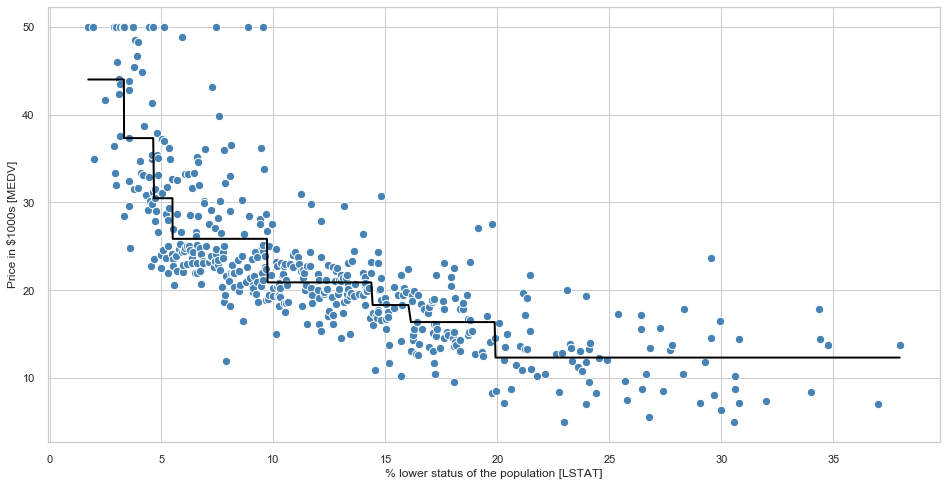

In [47]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                  # Plot actual target against features
            edgecolor='white', s=70)
plt.plot(X, tree.predict(X),                      # Plot predicted target against features
         color='black', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()